In [5]:
#import required libraries
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
import numpy as np
#importing time library for speed comparisons of both classifiers
import time
%matplotlib inline

In [6]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
#load test image
test1 = cv2.imread('./test.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

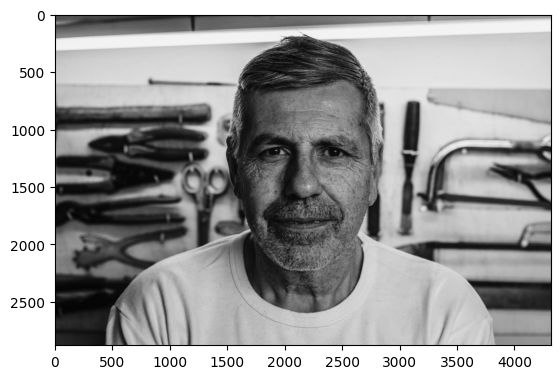

In [8]:
plt.imshow(gray_img, cmap='gray');

# Face Detection

In [9]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')


In [10]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.5, minNeighbors=5);
#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [11]:
test = haar_face_cascade.load('./haarcascade_frontalface_default.xml')
print(test)

True


In [12]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 10)

In [13]:
imgYCC = cv2.cvtColor(test1, cv2.COLOR_BGR2YCR_CB)

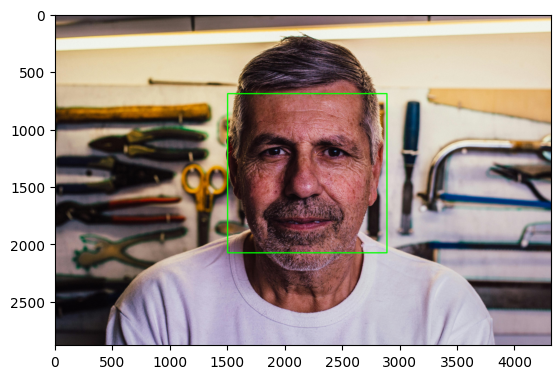

In [14]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test1))

- Grouping Code into a Function

In [15]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.2):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy

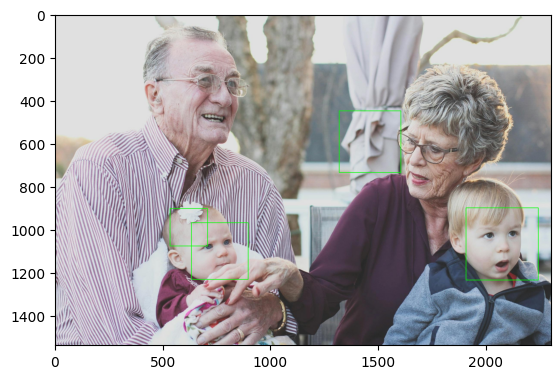

In [16]:
#load another image
test2 = cv2.imread('./family.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

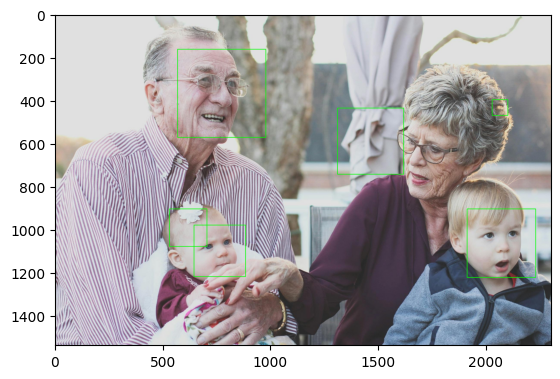

In [17]:
#load another image
test2 = cv2.imread('./family.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.1)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

# Smile Detection

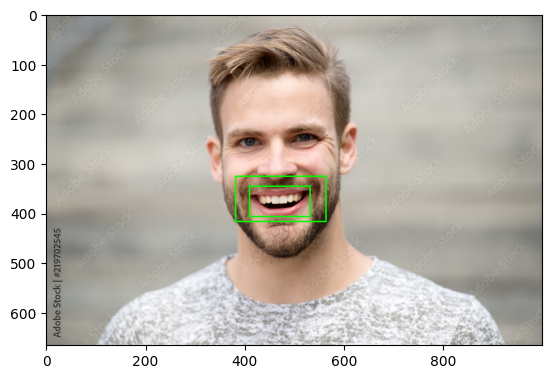

In [22]:
# this is a pre-trained face cascade
test_image = cv2.imread('./smile.jpg')
smile_cascade = cv2.CascadeClassifier('./haarcascade_smile.xml')
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
smiles = smile_cascade.detectMultiScale(gray, 1.5, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Eye Detection

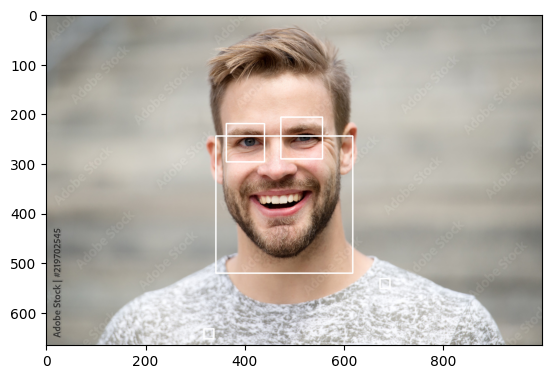

In [27]:
test_image = cv2.imread('./smile.jpg')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))